In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass
import pandas as pd
import vice

In [3]:
import surp
from surp.src.analysis.vice_model import vice_model
import surp.src.analysis.apogee_analysis as aah
from surp.src.analysis import plotting_utils as pluto
import arya
arya.save_at("./figures")

In [22]:
plt.rcParams["figure.dpi"] = 200

In [23]:
def find_model(name):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    
    file_name = "../results/" + name + ".csv"
    return pd.read_csv(file_name)


In [48]:
def zooh_data(ele="C", ax=None, **kwargs):
    """
    Plots the mean trend of apogee subgiants
    
    ax: plot axis
    ele: y axis element
    params: passed to 
    
    """
    if ax is None:
        ax = plt.gca()
    
    ha = aah.subgiants["high_alpha"]
    df = aah.subgiants[~ha]
    
    pluto.plot_mean_track(df["MG_H"], df[f"{ele}_MG"], xlim=(-0.5, 0.5), c="k", 
                          dropna=True, min_count=True, plot_points=True, shade_width=False, 
                          plot_errorbar=False, plot_alt=True, **kwargs)
                          
def zoofe_data(ele="C", mg_0=-0.1, w=0.05, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
        
    filt = aah.subgiants["MG_H"] > mg_0 - w
    filt &= aah.subgiants["MG_H"] < mg_0 + w
    df = aah.subgiants[filt]
    
    pluto.plot_mean_track(df["MG_FE"], df[f"{ele}_MG"], xlim=(-0.1, 0.5), c="k", 
                           dropna=True, min_count=True, plot_points=True, shade_width=False, 
                          plot_errorbar=False, plot_alt=True,
                          **kwargs)

In [54]:
def zooh_models(models, ele="C", ax=None):
    if ax is None:
        ax = plt.gca()
        
    name_0 = list(models.keys())[0]
    i = 0
    for name, model in models.items():
        pluto.plot_mean_track(model["MG_H"], model[f"{ele}_MG"], 
                              xlim=(-0.6, 0.6), label=name, ax=ax)
    zooh_data(ele, zorder=-2)

def zoofe_models(models: dict, ele="C", mg_0=0.1, w=0.05, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    
    name_0 = list(models.keys())[0]


    for name, model in models.items():
        filt = model.MG_FE > mg_0 - w
        filt &= model.MG_FE < mg_0 + w
        df = model[filt]
        pluto.plot_mean_track(df["MG_FE"], df[f"{ele}_MG"], 
                              xlim=(-0.3, 0.3), label=name, ax=ax)
    
    zoofe_data(ele=ele, mg_0=mg_0, w=w, zorder=-2)

In [35]:
fiducial = find_model("C11_f0.2_eta1_beta0.0005")

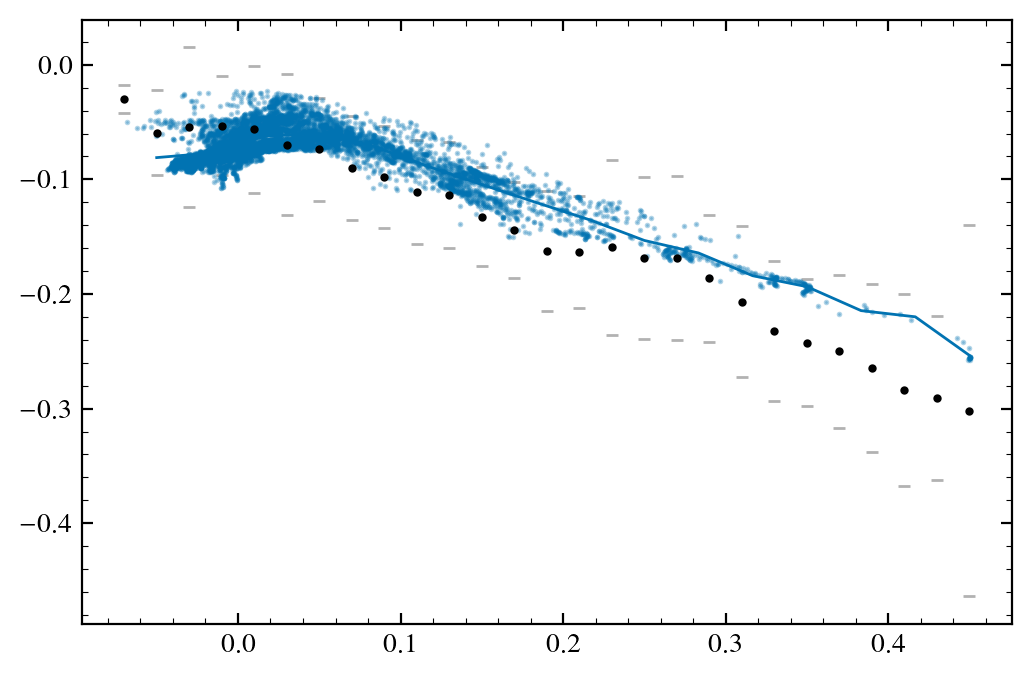

In [58]:
plt.scatter(fiducial.MG_FE, fiducial.C_MG, s=1, alpha=0.3)
pluto.plot_mean_track(fiducial.MG_FE, fiducial.C_MG, xlim=(-0.5, 0.5), bins=30)
zoofe_data()


In [55]:
def compare(names, labels, ele = "C" , filename=None):
    models = {label: find_model(name) for name, label in zip(names, labels)}
    
    jp = arya.JoinPlot(1, 2)

    sp = jp.children[0][0]

    plt.sca(sp.mpl_ax)
    zooh_models(models, ele)  

    sp.x.label = f"[Mg/H]"
    sp.y.label = f"[{ele}/Mg]"
    sp.x.lim = (-0.6, 0.6) 
    sp.y.lim = (-0.4, 0.1)
    sp.x.ticks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4]
    pluto.fancy_legend(ax=sp.mpl_ax, colors=arya.style.COLORS)

    
    sp = jp.children[0][1]
    plt.sca(sp.mpl_ax)
    zoofe_models(models, ele)
    
    
    sp.x.label = r"[Mg/Fe]"
    sp.y.label = r""
    sp.x.lim = (-0.15, 0.4)
    sp.mpl_ax.set_title("")
    
    if filename is not None:
        sp.save(filename)


one file saved at ./figures/oob_agb.pdf


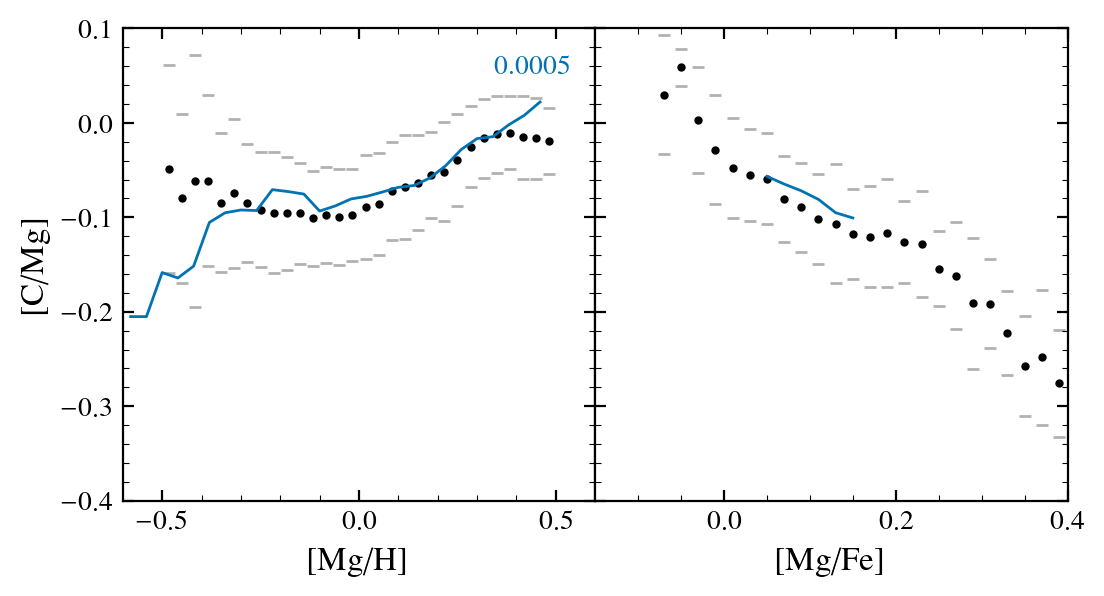

In [56]:
names = ["C11_f0.2_eta1_beta0.001"]
labels = [0.0005]

compare(names, labels, filename="oob_agb.pdf")

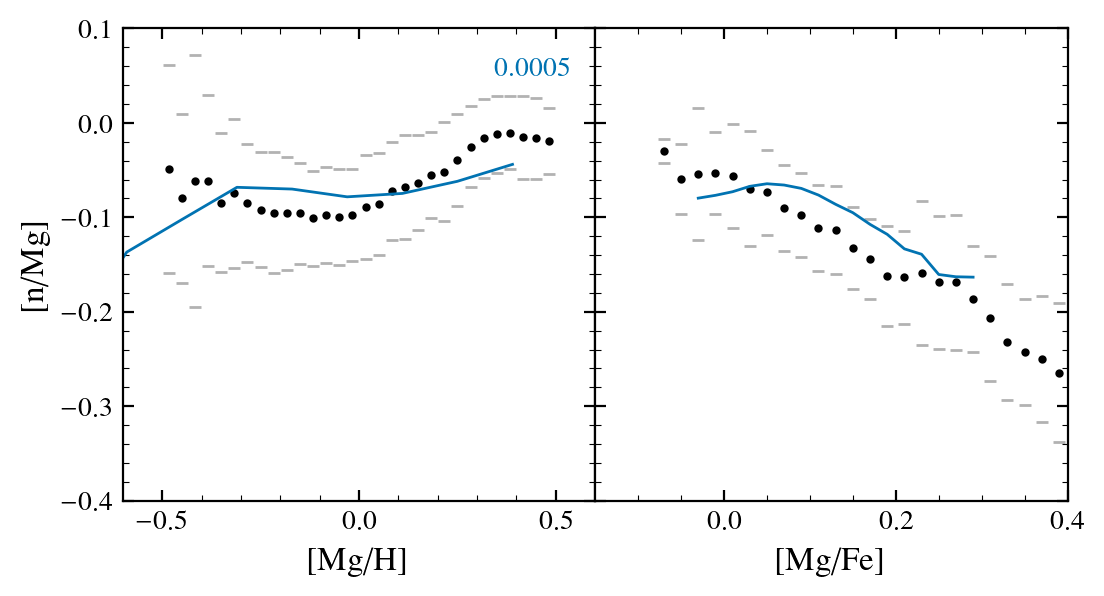

In [17]:
compare(names, labels, ele="n")

In [35]:
names = []
for agb in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    names.append(model_id(agb=agb, f_agb="o", beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["C11", "K10", "V13", "K16"]
compare(names, labels, filename="oob_agb.pdf")

NameError: name 'model_id' is not defined

one file saved at ./figures/f_agb.pdf


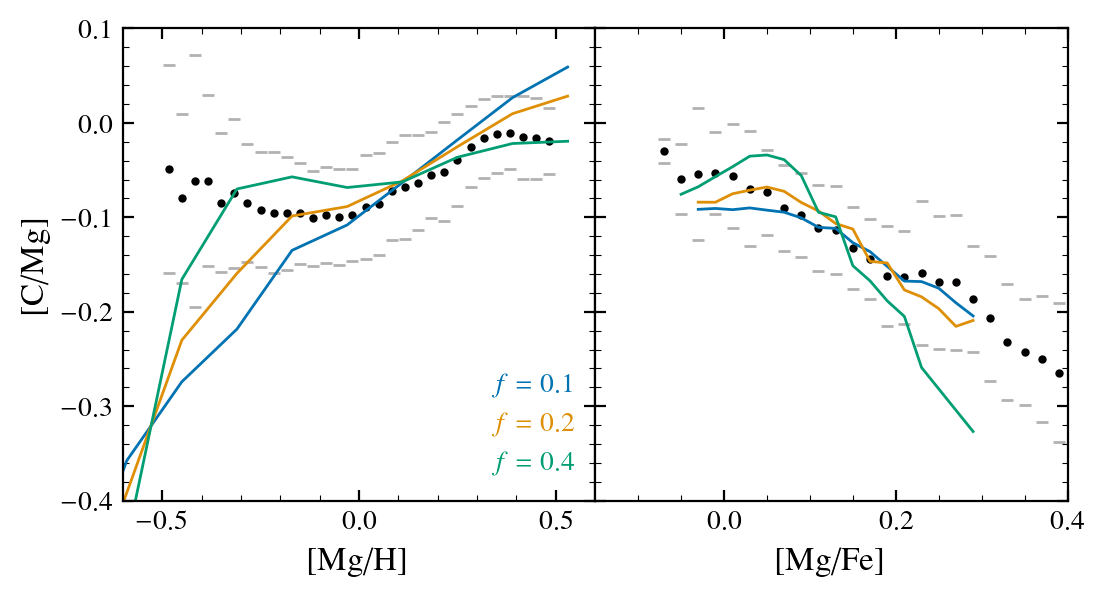

In [10]:
names = []
for f in ["0.1", "0.2", "0.4"]:
    names.append(model_id(agb="cristallo11", f_agb=f, beta="0.4", eta="1.0", version="_v0.1.3"))
labels = ["$f=0.1$", "$f=0.2$", "$f=0.4$"]
compare(names, labels, filename="f_agb.pdf")

one file saved at ./figures/beta.pdf


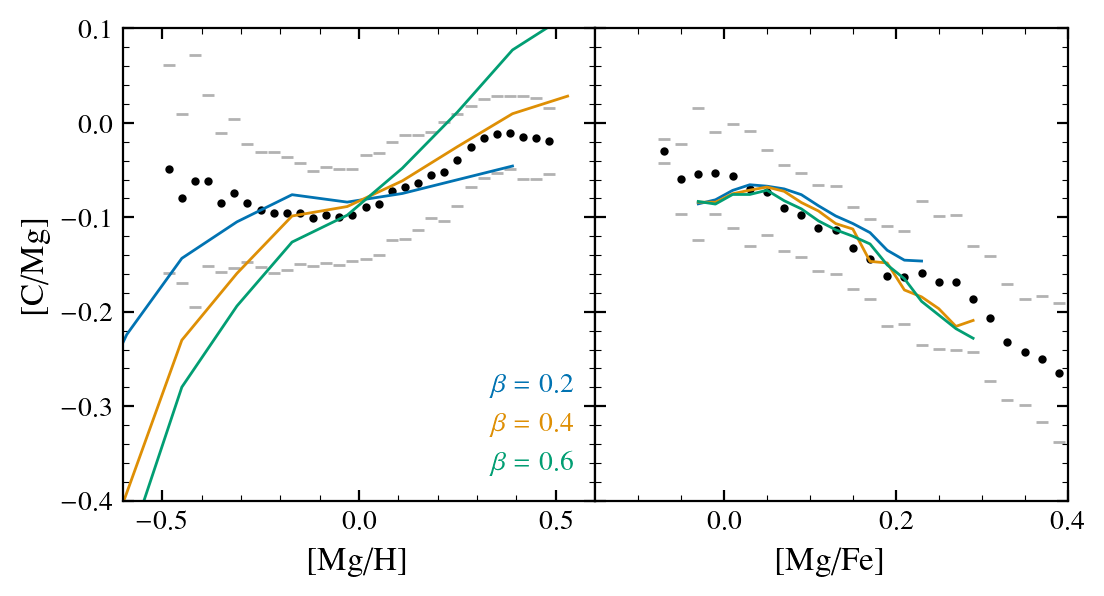

In [11]:
names = []
for beta in ["0.2", "0.4", "0.6"]:
    names.append(model_id(agb="cristallo11", f_agb="0.2", beta=beta, eta="1.0", version="_v0.1.3"))
labels = [r"$\beta=0.2$", r"$\beta=0.4$", r"$\beta=0.6$"]
compare(names, labels, filename="beta.pdf")


one file saved at ./figures/lateburst_eta.pdf


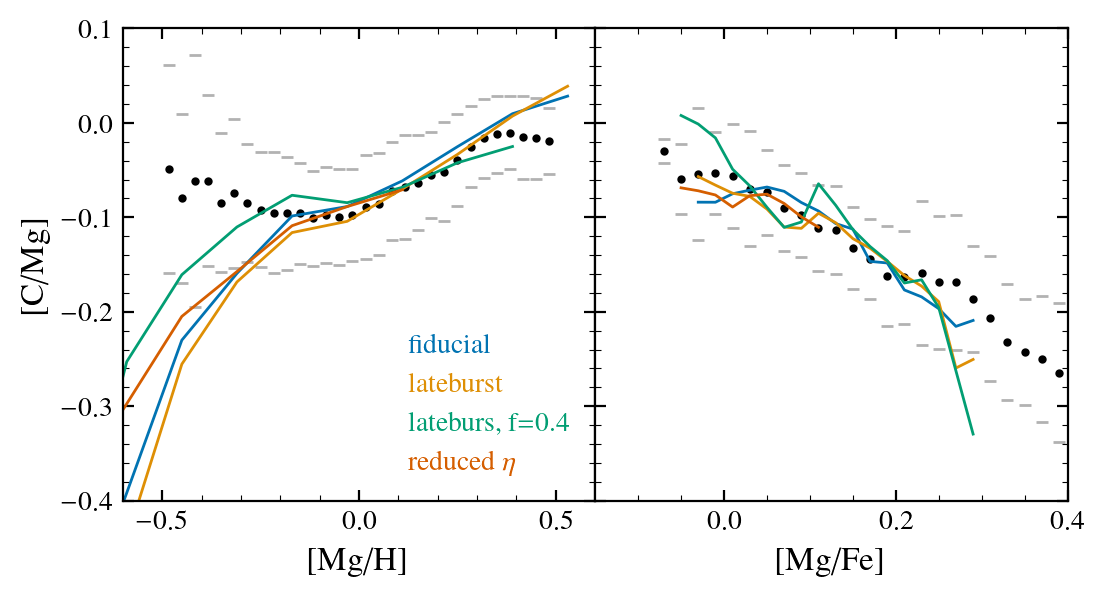

In [12]:
fnames = ["cristallo11_f0.2_Z0.4_eta1.0_v0.1.3", "cristallo11_f0.2_Z0.4_eta1.0_v0.1.3_lateburst", "cristallo11_f0.4_Z0.4_eta1.0_v0.1.3_lateburst",  "cristallo11_f0.2_Z0.4_eta0.3_v0.1.3"]
names = []
for s in fnames:
    names.append(model_id(name=s))
    
labels=["fiducial", "lateburst", "lateburs, f=0.4", r"reduced $\eta$"]
compare(names, labels, filename="lateburst_eta.pdf")

In [7]:
width = 4
ϕ = np.sqrt(2)
height = width/ϕ
arya.style.set_size((width, height))


one file saved at ./figures/cooh_scatter.pdf


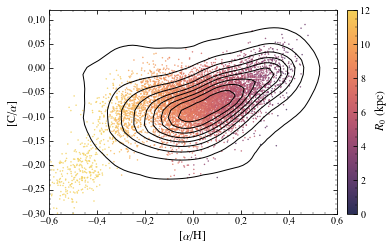

In [11]:
s = fiducial.stars["solar"]
N = len(s)
dx = 0.03
dy = 0.03
sp = arya.Subplot()
aah.plot_contour("[mg/h]", "[c/mg]", ax=sp.mpl_ax, zorder=3)

scat = arya.Scatter(s["[o/h]"] + np.random.normal(0, dx, N), s["[c/o]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.2, zorder=2, subplot=sp)
scat.clim = (0, 12)
cb = arya.Colorbar(subplot=sp, layer=scat, row=0, col=1, width=arya.Length(0.05*height))
cb.label = "$R_0$ (kpc)"


sp.x.label=r"[$\alpha$/H]"
sp.y.label=r"[C/$\alpha$]"
sp.x.lim=(-0.6, 0.6)
sp.y.lim=(-0.3, 0.12)

sp.save("cooh_scatter.pdf")

In [13]:
10**0.1

1.2589254117941673

one file saved at ./figures/cnoh_scatter.pdf


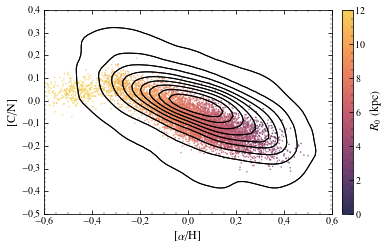

In [12]:
s = fiducial.stars["solar"]
N = len(s)
dx = 0.03
dy = 0.03
sp = arya.Subplot()
aah.plot_contour("[mg/h]", "[c/n]", ax=sp.mpl_ax, zorder=3)
aah.plot_contour("[mg/h]", "[c/n]", ax=sp.mpl_ax, zorder=3)

scat = arya.Scatter(s["[o/h]"] + np.random.normal(0, dx, N), s["[c/n]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.2, zorder=2, subplot=sp)
scat.clim = (0, 12)
cb = arya.Colorbar(subplot=sp, layer=scat, row=0, col=1,  width=arya.Length(0.05*height))
cb.label = "$R_0$ (kpc)"


sp.x.label=r"[$\alpha$/H]"
sp.y.label=r"[C/N]"
sp.x.lim=(-0.6, 0.6)
sp.y.lim=(-0.5, 0.4)

sp.save("cnoh_scatter.pdf")

In [9]:
names = []
for agb in ["cristallo11", "karakas10", "ventura13", "karakas16"]:
    names.append(model_id(agb=agb, f_agb="0.4", beta="0.4", eta="1.0", version="_v0.1.3_lateburst"))
labels = ["C11$'$", "K10$'$", "V13$'$", "K16$'$"]
models = {label: find_model(name) for name, label in zip(names, labels)}


one file saved at ./figures/coofe_agb_extra_0.2.pdf


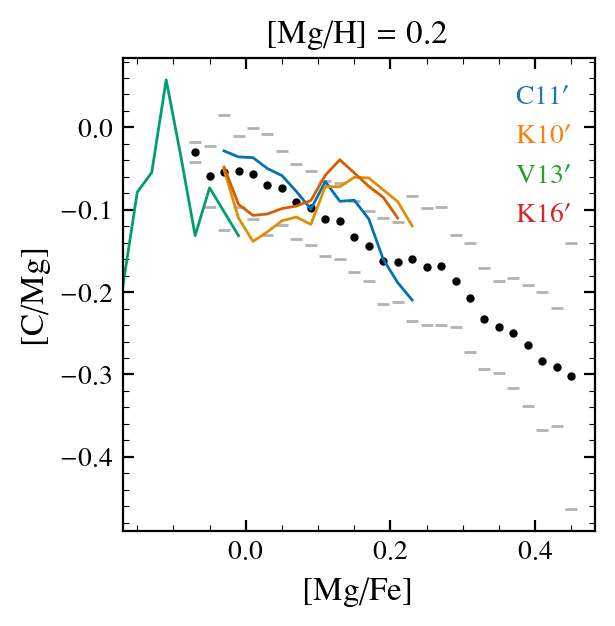

In [15]:
sp = arya.Subplot()
plot_coofe(models, 0.2)
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")
plt.xlim(-0.17)
pluto.fancy_legend()
plt.title(r"$[\text{Mg/H}]=0.2$", fontsize="large")

sp.save("coofe_agb_extra_0.2.pdf")

one file saved at ./figures/coofe_agb_extra.pdf


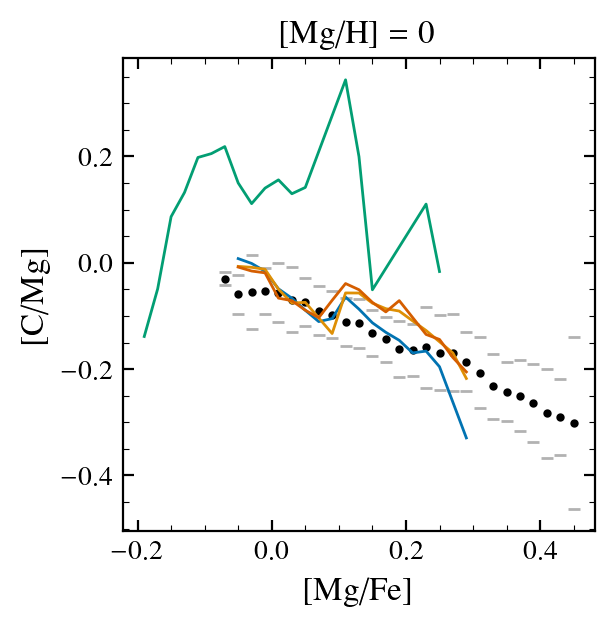

In [16]:
sp = arya.Subplot()
plot_coofe(models, 0)

plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")
plt.title(r"$[\text{Mg/H}]=0$", fontsize="large")
sp.save("coofe_agb_extra.pdf")